<br>
<img style="float:left" src="http://ipython.org/_static/IPy_header.png" />
<br>

# Session 2: Working with a corpus of Malcolm Fraser's speeches

In [14]:
import sys
import nltk
from IPython.display import display, clear_output
sys.path.append("/usr/lib/python2.7/site-packages/")
%matplotlib inline

**Welcome back!**

So, what did we learn yesterday? A brief recap:

* The **IPython** Notebook
* **Python**: syntax, variables, functions, etc.

Today's focus will be on **developing more advanced NLTK skills** and using these skills to **investigate the Fraser Speeches Corpus**. In the final session, we will discuss **how to use what you have learned here in your own research**.

*Any questions or anything before we dive in?*

## Malcolm Fraser and his speeches

So, for much of the next two sessions, we are going to be working with a corpus of speeches made by Malcolm Fraser. 

In [15]:
# this code allows us to display images and webpages in our notebook
from IPython.display import display
from IPython.display import display_pretty, display_html, display_jpeg, display_png, display_svg
from IPython.display import Image
from IPython.display import HTML
import nltk

In [16]:
Image(url='http://www.unimelb.edu.au/malcolmfraser/photographs/family/105~36fam6p9.jpg')

Because our project here is *corpus driven*, we don't necessarily need to know about Malcolm Fraser and his speeches in order to analyse the data: we may be happy to let things emerge from the data themselves. Even so, it's nice to know a bit about him.

Malcolm Fraser was a member of Australian parliament between 1955 and 1983, holding the seat of Wannon in western Victoria. He held a number of ministries, including Education and Science, and Defence. 

He became leader of the Liberal Party in March 1975 and Prime Minister of Australia in December 1975, following the dismissal of the Whitlam government in November 1975.

He retired from parliament following the defeat of the Liberal party at the 1983 election and in 2009 resigned from the Liberal party after becoming increasingly critical of some of its policies. He died on 20 March, 2015.

In [17]:
HTML('<iframe src=http://en.wikipedia.org/wiki/Malcolm_Fraser width=700 height=350></iframe>')

In 2004, Malcolm Fraser made the University of Melbourne the official custodian of his personal papers. The collection consists of a large number of photographs, speeches and personal papers, including Neville Fraser's WWI diaries and materials relating to CARE Australia, which Mr Fraser helped to found in 1987. 

In [18]:
HTML('<iframe src=http://www.unimelb.edu.au/malcolmfraser/ width=700 height=350></iframe>')

Between 1954 until 1983, Malcolm Fraser regularly made a talk to his electorate that was broadcast on Sunday evening on local radio.  

The speeches were transcribed years ago. Optical Character Recognition (OCR) was used to digitise the transcripts. This means that the texts are not of perfect quality. 

Some have been manually corrected, which has removed extraneous characters and mangled words, but even so there are still some quirks in the formatting. 

For much of this session, we are going to manipulate the corpus data, and use the data to restructure the corpus. 

## Cleaning the corpus

A common part of corpus building is corpus cleaning. Reasons for cleaning include:

1. Not break the code with unexpected input
2. Ensure that searches match as many examples as possible
3. Increasing readability, the accuracy of taggers, stemmers, parsers, etc.

The level of kind of cleaning depends on your data and the aims of your project. In the case of very clean data (lucky you!), there may be little that needs to be done. With messy data, you may need to go as far as to correct variant spellings (online conversation, very old books).

### Discussion

*What are the characteristics of clean and messy data? Any personal experiences? Discuss with your neighbours.* 

It will be important to bear these characteristics in mind once you start building your own datasets and corpora. 

## Exploring the corpus

First of all, let's load in our text.

Via file management, open and inspect one file in *corpora/UMA_Fraser_Radio_Talks*. What do you see? Are there any potential problems?

We can also look at file contents within the IPython Notebook itself:

In [19]:
import os

In [20]:
# import tokenizers
from nltk import word_tokenize
from nltk.text import Text

In [21]:
# make a list of files in the directory 'UMA_Fraser_Radio_Talks'
files = os.listdir('../UMA_Fraser_Radio_Talks')
print files[:3]


['UDS2013680-1-full.txt', 'UDS2013680-10-full.txt', 'UDS2013680-100-full.txt']


Actually, since we'll be referring to this path quite a bit, let's make it into a variable. This makes our code easier to use on other projects (and saves typing)

In [22]:
corpus_path = '../UMA_Fraser_Radio_Talks'

We can now tell Python to get the contents of a file in the file list and print it:

In [23]:
# print file contents
# change zero to something else to print a different file
# "r" tells python that it has the ability to read the files
files = open(os.path.join(corpus_path, files[0]), "r")
text = files.read()
print text

<!--start metadata-->
Title: Ministry of Defence, Vietnam
Description: Radio talk
Date: 12/11/1969
Collection: John Malcolm Fraser, 2007.0023
Collection URI: http://gallery.its.unimelb.edu.au/imu/imu.php?request=load&irn=115190&ecatalogue=on&view=details
Format: Uncorrected OCR text
<!--end metadata-->



                        I am looking forward to my new task as Minister for Defence, although
                        it is with regret that I relinquish my post as Minister for Education 
                        and Science.
                        I was associated with my old portfolio at a time when great changes 
                        were taking place in education.
                        These changes were occurring at a time of unprecedented public 
                        interest and concern for education, at a time of increasing student 
                        numbers and rising aspirations.
                        I was glad to have played a part in the task that continu

### Exploring further: splitting up text

We've had a look at one file, but the real strength of NLTK is to be able to explore large bodies of text. 

When we manually inspected the first file, we saw that it contained a metadata section, before the body of the text. 

We can ask Python to show us just the start of the file. For analysing the text, it is useful to split the metadata section off, so that we can interrogate it separately but also so that it won't distort our results when we analyse the text.

In [24]:
# split the file we read in above into two parts
data = text.split("<!--end metadata-->")

In [25]:
# view the first part
print data[0]

<!--start metadata-->
Title: Ministry of Defence, Vietnam
Description: Radio talk
Date: 12/11/1969
Collection: John Malcolm Fraser, 2007.0023
Collection URI: http://gallery.its.unimelb.edu.au/imu/imu.php?request=load&irn=115190&ecatalogue=on&view=details
Format: Uncorrected OCR text



In [26]:
# split into lines, add '*' to the start of each line
# \r is a carriage return, like on a typewriter.
# \n is a newline character
for line in data[0].split('\r\n'):
    print '*', line

* <!--start metadata-->
* Title: Ministry of Defence, Vietnam
* Description: Radio talk
* Date: 12/11/1969
* Collection: John Malcolm Fraser, 2007.0023
* Collection URI: http://gallery.its.unimelb.edu.au/imu/imu.php?request=load&irn=115190&ecatalogue=on&view=details
* Format: Uncorrected OCR text
* 


In [27]:
# skip empty lines and any line that starts with '<'
for line in data[0].split('\r\n'):
    if not line:
        continue
    if line[0] == '<':
        continue
    print '*', line

* Title: Ministry of Defence, Vietnam
* Description: Radio talk
* Date: 12/11/1969
* Collection: John Malcolm Fraser, 2007.0023
* Collection URI: http://gallery.its.unimelb.edu.au/imu/imu.php?request=load&irn=115190&ecatalogue=on&view=details
* Format: Uncorrected OCR text


In [28]:
# split the metadata items on ':' so that we can interrogate each one
for line in data[0].split('\r\n'):
    if not line:
        continue
    if line[0] == '<':
        continue
    element = line.split(':')
    print '*', element

* ['Title', ' Ministry of Defence, Vietnam']
* ['Description', ' Radio talk']
* ['Date', ' 12/11/1969']
* ['Collection', ' John Malcolm Fraser, 2007.0023']
* ['Collection URI', ' http', '//gallery.its.unimelb.edu.au/imu/imu.php?request=load&irn=115190&ecatalogue=on&view=details']
* ['Format', ' Uncorrected OCR text']


In [29]:
# actually, only split on the first colon
for line in data[0].split('\r\n'):
    if not line:
        continue
    if line[0] == '<':
        continue
    element = line.split(':', 1)
    print '*', element

* ['Title', ' Ministry of Defence, Vietnam']
* ['Description', ' Radio talk']
* ['Date', ' 12/11/1969']
* ['Collection', ' John Malcolm Fraser, 2007.0023']
* ['Collection URI', ' http://gallery.its.unimelb.edu.au/imu/imu.php?request=load&irn=115190&ecatalogue=on&view=details']
* ['Format', ' Uncorrected OCR text']


### **Challenge**: Building a Dictionary

We've already worked with strings and lists. Another kind of data structure in Python is a *dictionary*.

Here is how a simple dictionary works:

In [30]:
# create a dictionary
commonwords = {'the': 4023, 'of': 3809, 'a': 3098}
# search the dictionary for 'of'
commonwords['of']

3809

In [31]:
type(commonwords)

dict

The point of dictionaries is to store a *key* (the word) and a *value* (the count). When you ask for the key, you get its value.

Notice that you use curly braces for dictionaries, but square brackets for lists.

Dictionaries are a great way to work with the metadata in our corpus. Let's build a dictionary called *metadata*:

Your first line will look like this:

      metadata = {}

In [32]:
metadata = {}
for line in data[0].split('\r\n'):
    if not line:
        continue
    if line[0] == '<':
        continue
    element = line.split(':', 1)
    metadata[element[0]] = element[-1]
print metadata

{'Collection URI': ' http://gallery.its.unimelb.edu.au/imu/imu.php?request=load&irn=115190&ecatalogue=on&view=details', 'Description': ' Radio talk', 'Format': ' Uncorrected OCR text', 'Title': ' Ministry of Defence, Vietnam', 'Collection': ' John Malcolm Fraser, 2007.0023', 'Date': ' 12/11/1969'}


In [33]:
# look up the date
print metadata['Date']

 12/11/1969


### Building functions

**Challenge**: define a function that creates a dictionary of the metadata for each file and gets rid of the whitespace at the start of each element

**Hint**: to get rid of the whitespace use the *.strip()* command.

In [34]:
# open the first file, read it and then split it into two parts, metadata and body
data = open(os.path.join(corpus_path, 'UDS2013680-100-full.txt'))
data = data.read().split("<!--end metadata-->")

In [35]:
def parse_metadata(text):
    metadata = {}
    for line in text.split('\r\n'):
        if not line:
            continue
        if line[0] == '<':
            continue
        element = line.split(':', 1)
        metadata[element[0]] = element[-1].strip(' ')
    return metadata

Test it out!

In [36]:
parse_metadata(data[0])

{'Collection': 'John Malcolm Fraser, 2007.0023',
 'Collection URI': 'http://gallery.its.unimelb.edu.au/imu/imu.php?request=load&irn=115190&ecatalogue=on&view=details',
 'Date': '2/04/1963',
 'Description': 'press statement',
 'Format': 'Uncorrected OCR text',
 'Title': 'Portland wool sales'}

Now that we're confident that the function works, let's find out a bit about the corpus.
As a start, it would be useful to know which years the texts are from. Are they evenly distributed over time? A graph will tell us!

In [37]:
#import conditional frequency distribution
from nltk.probability import ConditionalFreqDist
import matplotlib
% matplotlib inline

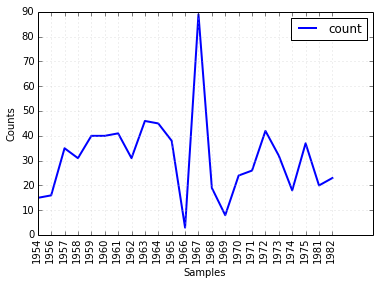

In [38]:
cfdist = ConditionalFreqDist()
for filename in os.listdir(corpus_path):
    text = open(os.path.join(corpus_path, filename)).read()
    #split text of file on 'end metadata'
    text = text.split("<!--end metadata-->")
    #parse metadata using previously defined function "parse_metadata"
    metadata = parse_metadata(text[0])
    #skip all speeches for which there is no exact date
    if metadata['Date'][0] == 'c':
        continue
    #build a frequency distribution graph by year, that is, take the final bit of the 'Date' string after '/'
    cfdist['count'][metadata['Date'].split('/')[-1]] += 1
cfdist.plot()

Now let's build another graph, but this time by the 'Description' field:

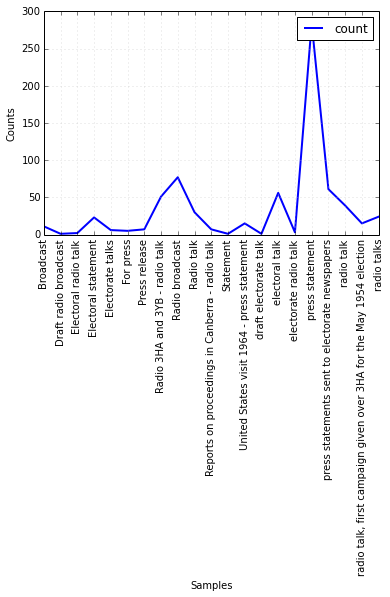

In [39]:
cfdist2 = ConditionalFreqDist()
for filename in os.listdir(corpus_path):
    text = open(os.path.join(corpus_path, filename)).read()
    text = text.split("<!--end metadata-->")
    metadata = parse_metadata(text[0])
    if metadata['Date'][0] == 'c':
        continue
    cfdist2['count'][metadata['Description']] += 1
cfdist2.plot()

#### Discussion

We've got messy data! What's the lesson here?
<br>

**Bonus chellenge**: Build a frequency distribution graph that includes speeches without an exact date.
Hint: you'll need to tell Python to ignore the 'c' and just take the digits

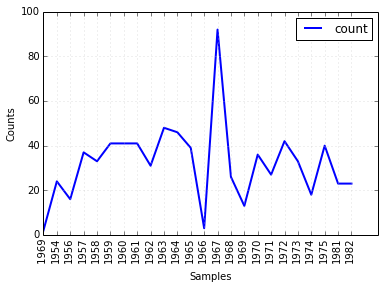

In [40]:
cfdist3 = ConditionalFreqDist()
for filename in os.listdir(corpus_path):
    text = open(os.path.join(corpus_path, filename)).read()
    text = text.split("<!--end metadata-->")
    metadata = parse_metadata(text[0])
    date = metadata['Date']
    if date[0] == 'c':
        year = date[1:]
    elif date[0] != 'c':
        year = date.split('/')[-1]
    cfdist3['count'][year] += 1
cfdist3.plot()

### Ordering our data

Previously, we looked at features of language in whole books. The way in which you organise your data will affect the ways in which you can interrogate it. Because our data samples span a long stretch of time, we thought we'd investigate the ways in which Malcolm Fraser's language changes over time. This will be the key focus of the next session.

In order to study this, it is helpful to structure our data according to the year of the sample. This simply means creating folders for each sample year, and moving the text of each speech into the correct one.

We can use our metadata parser to help with this task. Then, after structuring our corpus by date, we want the metadata gone, so that when we count language features in the files, we are not also counting the metadata.


#### Side note - Regular expressions
Regular expressions are a powerful means of searching for patterns in data. In this case, we're going to construct a regular expression to find the year of each speech. There are various ways in which we could write this expression, depending on how confident we are that the data is clean and the range of dates we're interested in.

In [41]:
import re
import os
# a path to our soonwordso-be organised corpus
newpath = '../corpora/fraser-year'
os.makedirs(newpath)
files = os.listdir(corpus_path)
# define a regex to match year portion of date
yearfinder = re.compile('19[0-9]{2}')
for filename in files:
    # split file contents at end of metadata
    text = open(os.path.join(corpus_path, filename))
    data = text.read().split("<!--end metadata-->")
    # get date from data[0]
    # use our metadata parser to get metadata
    metadata = parse_metadata(data[0])
    #look up date field of dict entry
    date = metadata.get('Date')
    # search date for year
    yearmatch = re.search(yearfinder, str(date))
    #get the year as a string
    year = str(yearmatch.group())
    # make a directory with the year name
    if not os.path.exists(os.path.join(newpath, year)):
        os.makedirs(os.path.join(newpath, year))
    # make a new file with the same name as the old one in the new dir
    fo = open(os.path.join(newpath, year, filename),"w")
    # write the content portion, without metadata
    fo.write(data[1])
    fo.close()

Did it work? How can we check?

In [42]:
print os.listdir(newpath)
print os.listdir(newpath + '/1981')

['1954', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1981', '1982']
['UDS2013680-703-full.txt', 'UDS2013680-704-full.txt', 'UDS2013680-705-full.txt', 'UDS2013680-706-full.txt', 'UDS2013680-707-full.txt', 'UDS2013680-708-full.txt', 'UDS2013680-709-full.txt', 'UDS2013680-710-full.txt', 'UDS2013680-711-full.txt', 'UDS2013680-712-full.txt', 'UDS2013680-713-full.txt', 'UDS2013680-714-full.txt', 'UDS2013680-715-full.txt', 'UDS2013680-716-full.txt', 'UDS2013680-717-full.txt', 'UDS2013680-718-full.txt', 'UDS2013680-719-full.txt', 'UDS2013680-720-full.txt', 'UDS2013680-721-full.txt', 'UDS2013680-722-full.txt', 'UDS2013680-723-full.txt', 'UDS2013680-724-full.txt', 'UDS2013680-725-full.txt']


## Using NLTK to analyse the Fraser Corpus

The books were were working with yesterday had already had some processing done on them so that we could use NLTK to find features of the language. Remember that Python regards a text file as a single long string of characters. The first thing to do is to start breaking the text up into sentences and words.

In [48]:
from nltk import word_tokenize
speech = open('../corpora/fraser-year/1975/UDS2013680-678-full.txt', "r").read() 
tokens = word_tokenize(speech)
print tokens[:100]

['ELECTORAL', 'RADIO', 'TALK', 'Embargo', ':', 'Sunday', ',', '23rd', 'Feb.', '75', '.', '6.00', 'p.m', '.', 'THE', 'HON', '.', 'MEMBER', 'FOR', 'WANNON', '-', 'MALCOLM', 'FRASER', 'In', 'answer', 'to', 'questions', 'early', 'this', 'week', ',', 'the', 'Treasurer', ',', 'Dr', 'Cairns', ',', 'put', 'himself', 'in', 'direct', 'contradiction', 'to', 'the', 'Prime', 'Minister', 'concerning', 'the', 'nature', 'of', 'economic', 'problems', '.', 'On', 'the', '27th', 'January', ',', 'Mr', 'Whitlam', 'was', 're-', 'ported', 'to', 'have', 'said', 'from', 'Adelaide', ':', "''", 'You', 'can', 'not', 'blame', 'Vietnam', 'for', 'the', 'inflation', 'in', 'the', 'Western', 'world', '.', '``', 'You', 'can', 'not', 'blame', 'the', 'Oil', 'crisis', 'for', 'the', 'inflation', 'in', 'Australia', '.', 'You', 'can', 'not']


Breaking a speech into tokens lets us do the sort of word counting that we were doing yesterday on the speeches. We can do some more interesting linguistic analysis if we use Part of Speech tagging. 

In [49]:
sentence = "They refuse to permit us the refuse permit"
words = word_tokenize(sentence)
tagged = nltk.pos_tag(words)
print tagged

[('They', 'PRP'), ('refuse', 'VBP'), ('to', 'TO'), ('permit', 'VB'), ('us', 'PRP'), ('the', 'DT'), ('refuse', 'NN'), ('permit', 'NN')]


Part of Speech tagging creates bigrams, that is, it associates the word with its tag in a pair of items that we can see above in brackets. By 

### Challenge!
Use Part of Speech tagging to tag the speech that we have just tokenised
Create frequency distribtion graphs to find:
* The most common parts of speech
* The most common verbs and nouns in the speech

### Interrogating the corpus

In [ ]:
# any token containing letters or numbers (i.e. no punctuation):
# we specify here that it cannot have any descendants,
# just to be sure we only get tokens, not tags.
allwords_query = r'/[A-Za-z0-9]/ !< __' 

Next, we perform interrogations with *interrogator()*. Its most important arguments are:

1. **path to corpus** (the *path* variable)

2. Tregex **options**:
  * **'t'**: return only words
  * **'c'**: return a count of matches

3. the **Tregex query**

We only need to count tokens, so we can use the **count** option (it's often faster than getting lists of matching tokens). The cell below will run *interrogator()* over each annual subcorpus and count the number of matches for the query.

In [ ]:
allwords = interrogator(path, 'count', allwords_query) 

When the interrogation has finished, we can view the total counts by getting the *totals* branch of the *allwords* interrogation:

In [ ]:
# from the allwords results, print the totals
print allwords.totals

If you want to see the query and options that created the results, you can print the *query* branch.

In [ ]:
print allwords.query

### Plotting results

Lists of years and totals are pretty dry. Luckily, we can use the *plot()* function to visualise our results. At minimum, *plot()* needs two arguments:

1. a title (in quotation marks)
2. a list of results to plot

In [ ]:
plot('Word counts in each subcorpus', allwords.totals)

Great! So, we can see that the number of words per year varies quite a lot. That's worth keeping in mind.

Next, let's plot something more specific, using the **words** option.

In [ ]:
query = r'/(?i)\baustral.?/' # australia, australian, australians, etc.
aust = interrogator(path, 'words', query) # words option to get matching words, not just count

We now have a list of words matching the query stores in the *aust* variable's *results* branch:

In [ ]:
aust.results[:3] # just the first few entries

*Your turn!* Try this exercise again with a different term. 

We can use a *fract_of* argument to plot our results as a percentage of something else. This helps us deal with the issue of different amounts of data per year.

In [ ]:
# as a percentage of all aust* words:
plot('Austral*', aust.results, fract_of = aust.totals)
# as a percentage of all words (using our previous interrogation)
plot('Austral*', aust.results, fract_of = allwords.totals)

Great! So, we now have a basic understanding of the *interrogator()* and *plot()* functions.

### Customising visualisations

By default, *plot()* plots the absolute frequency of the seven most frequent results.

 We can use other *plot()* arguments to customise what our chart shows. *plot()*'s possible arguments are:

 | plot() argument | Mandatory/default?       |  Use          | Type  |
 | :------|:------- |:-------------|:-----|
 | *title* | **mandatory**      | A title for your plot | string |
 | *results* | **mandatory**      | the results you want to plot | *interrogator()* total |
 | *fract_of* | None      | results for plotting relative frequencies/ratios etc. | list (interrogator(count) form) |
 | *num_to_plot* | 7     | number of top results to display     |   integer |
 | *multiplier* | 100     | result * multiplier / total: use 1 for ratios | integer |
 | *x_label* | False    | custom label for the x-axis     |  string |
 | *y_label* | False    | custom label for the y-axis     |  string |
 | *yearspan* | False    | plot a span of years |  a list of two int years |
 | *justyears* | False    | plot specific years |  a list of int years |
 | *csvmake* | False    | make csvmake the title of csv output file    |  string |

You can easily use these to get different kinds of output. Try changing some parameters below:

In [ ]:
# maybe we want to get rid of all those non-words?
plot('Austral*', aust.results, fract_of = allwords.totals, num_to_plot = 3, y_label = 'Percentage of all words')

In [ ]:
# or see only the 1960s?
plot('Austral*', aust.results, fract_of = allwords.totals, num_to_plot = 3, yearspan = [1960,1969])

**Your Turn**: mess with these variables, and see what you can plot. Try using some really infrequent results, if you like!

In [ ]:
#

In [ ]:
#

### Viewing and editing results

Aside from *interrogator()* and *plot()*, there are also a few simple functions for viewing and editing results.

#### quickview()

*quickview()* is a function that quickly shows the n most frequent items in a list. Its arguments are:

1. an *interrogator()* result
2. number of results to show (default = 50)

We can see the full glory of bad OCR here:

In [ ]:
quickview(aust.results, n = 20)

The number shown next to the item is its index. You can use this number to refer to an entry when editing results.

#### tally()

*tally()* displays the total occurrences of results. Its first argument is the list you want tallies from. For its second argument, you can use:

* a list of indices for results you want to tally
* a single integer, which will be interpreted as the index of the item you want
* a string, 'all', which will tally every result. This could be very many results, so it may be worth limiting the number of items you pass to it with [:n],

In [ ]:
tally(aust.results, [0, 3])

**Your turn**: Use 'all' to tally the result for the first 11 items in aust.results

In [ ]:
tally(aust.results[:10], 'all')

#### surgeon()

Results lists can be edited quickly with *surgeon()*. *surgeon()*'s arguments are:

1. an *interrogator()* results list
2. *criteria*: either a regex or a list of indices.
3. *remove = True/False*

By default, *surgeon()* removes anything matching the regex/indices criteria, but this can be inverted with a *remove = False* argument. Because you are duplicating the original list, you don't have to worry about deleting *interrogator()* results.

We can use it to remove some obvious non-words.

In [ ]:
non_words_removed = surgeon(aust.results, [5, 9], remove = True)
plot('Some non-words removed', non_words_removed, fract_of = allwords.totals)

Note that you do not access surgeon lists with *aust.non_words_removed* syntax, but simply with *non_words_removed*.

#### merger()

*merger()* is for merging items in a list. Like *surgeon()*, it duplicates the old list. Its arguments are:

1. the list you want to modify
2. the indices of results you want to merge, or a regex to match
3. newname = *str/int/False*: 
  * if string, the string becomes the merged item name.
  * if integer, the merged entry takes the name of the item indexed with the integer.
  * if not specified/False, the most most frequent item in the list becomes the name.

In our case, we might want to collapse *Australian* and *Australians*, because the latter is simply the plural of the former.

In [ ]:
# before:
plot('Before merging Australian and Australians', aust.results, num_to_plot = 3)
# after:
merged = merger(aust.results, [1, 2],  newname = 'australian(s)')
plot('After merging Australian and Australians', merged, num_to_plot = 2)

#### conc()

The final function is *conc()*, which produces concordances of a subcorpus based on a Tregex query. Its main arguments are:

1. A subcorpus to search *(remember to put it in quotation marks!)*
2. A Tregex query

In [ ]:
# here, we use a subcorpus of politics articles,
# rather than the total annual editions.
conc(os.path.join(path,'1966'), r'/(?i)\baustral.?/') # adj containing a risk word

You can set *conc()* to print *n* random concordances with the *random = n* parameter. You can also store the output to a variable for further searching.

In [ ]:
randoms = conc(os.path.join(path,'1963'), r'/(?i)\baustral.?/', random = 5)
randoms

*conc()* takes another argument, window, which alters the amount of cowordsext appearing either side of the match.

In [ ]:
conc(os.path.join(path,'1981'), r'/(?i)\baustral.?/', random = 5, window = 50)

*conc()* also allows you to view parse trees. By default, it's false:

In [ ]:
conc(os.path.join(path,'1954'), r'/(?i)\baustral.?/', random = 5, window = 30, trees = True)

# Now you're familiar with the corpus and functions, it's time to explore the corpus in a more structured way. To do this, we need a little bit of linguistic knowledge, however.

### Some linguistics...

*Functional linguistics* is a research area concerned with how *realised language* (lexis and grammar) work to achieve meaningful social functions.

One functional linguistic theory is *Systemic Functional Linguistics*, developed by Michael Halliday (Prof. Emeritus at University of Sydney).

Central to the theory is a division between **experiential meanings** and **interpersonal meanings**.

* Experiential meanings communicate what happened to whom, under what circumstances.
* Interpersonal meanings negotiate identities and role relationships between speakers 

Halliday argues that these two kinds of meaning are realised **simultaneously** through different parts of English grammar.

* Experiential meanings are made through **transitivity choices**.
* Interpersonal meanings are made through **mood choices**

Here's one visualisation of it. We're concerned with the two left-hand columns. Each level is an abstraction of the one below it.

<br>
<img style="float:left" src="https://raw.githubusercontent.com/resbaz/nltk/resources/images/egginsfixed.jpg" />
<br>

Transitivity choices include fitting together configurations of:

* Participants (*a man, green bikes*)
* Processes (*sleep, has always been, is considering*)
* Circumstances (*on the weekend*, *in Australia*)

Mood features of a language include:

* Mood types (*declarative, interrogative, imperative*)
* Modality (*would, can, might*)
* Lexical density--wordshe number of words per clause, the number of content to non-content words, etc.

Lexical density is usually a good indicator of the general tone of texts. The language of academia, for example, often has a huge number of nouns to verbs. We can approximate an academic tone simply by making nominally dense clauses: 

      The consideration of interest is the potential for a participant of a certain demographic to be in Group A or Group B*.

Notice how not only are there many nouns (*consideration*, *interest*, *potential*, etc.), but that the verbs are very simple (*is*, *to be*).

In comparison, informal speech is characterised by smaller clauses, and thus more verbs.

      A: Did you feel like dropping by?
      B: I thought I did, but now I don't think I want to

Here, we have only a few, simple nouns (*you*, *I*), with more expressive verbs (*feel*, *dropping by*, *think*, *want*)

> **Note**: SFL argues that through *grammatical metaphor*, one linguistic feature can stand in for another. *Would you please shut the door?* is an interrogative, but it functions as a command. *invitation* is a nominalisation of a process, *invite*. We don't have time to deal with these kinds of realisations, unfortunately.

### Fraser's speeches and linguistic theory

So, from an SFL perspective, when Malcolm Fraser gives a speech, he is simultaneously making meaning about events in the real world (through transitivity choices) and about his role and identity (through mood and modality choices).

With this basic theory of language, we can create two research questions:

1. **How does Malcolm Fraser's tone change over time?**
2. **What are the major things being spoken about in Fraser's speeches, and how do they change?**

As our corpus is well-structured and parsed, we can create queries to answer these questions, and then visualise the results.

#### Interpersonal features

We'll start with interpersonal features of language in the corpus. First, we can devise a couple of simple metrics that can teach us about the interpersonal tone of Fraser's speeches over time. We don't have time to run all of these queries right now, but there should be some time later to explore the parts of this material that interest

In [ ]:
# number of content words per clause
openwords = r'/\b(JJ|NN|VB|RB)+.?\b/'
clauses = r'S < __'
opencount = interrogator(path, 'count', openwords)
clausecount = interrogator(path, 'count', clauses)

In [ ]:
plot('Lexical density', opencount.totals, 
        fract_of = clausecount.totals, y_label = 'Lexical Density Score', multiplier = 1)

We can also look at the use of modals auxiliaries (*would could, may, etc.*) over time. This can be interesting, as modality is responsible for communicating certainty, probability, obligation, etc.

Modals are very easily and accurately located, as there are only a few possible words, and they occur in predicable places within clauses.

Most grammars tag them with 'MD'.

If modality interests you, later, it could be a good set of results to manipulate and plot.

In [ ]:
query = r'MD < __'
modals = interrogator(path, 'words', query)
plot('Modals', modals.results, fract_of = modals.totals)

In [ ]:
# percentage of tokens that are I/me
query = r'/PRP.?/ < /(?i)^(i|me|my)$/'
firstperson = interrogator(path, 'count', query)

In [ ]:
plot('First person', firstperson.totals, fract_of = allwords.totals)

In [ ]:
# percentage of questions
query = r'ROOT <<- /.?\?.?/'
questions = interrogator(path, 'count', query)

In [ ]:
plot('Questions/all clauses', questions.totals, fract_of = clausecount.totals)

In [ ]:
# ratio of open/closed class words
closedwords = r'/\b(DT|IN|CC|EX|W|MD|TO|PRP)+.?\b/'
closedcount = interrogator(path, 'count', closedwords)

In [ ]:
plot('Open/closed word classes', opencount.totals, 
        fract_of = closedcount.totals, y_label = 'Open/closed ratio', multiplier = 1)

In [ ]:
# ratio of nouns/verbs
nouns = r'/NN.?/ < __'
verbs = r'/VB.?/ < __'
nouncount = interrogator(path, 'count', nouns)
verbcount = interrogator(path, 'count', verbs)

In [ ]:
plot('Noun/verb ratio', nouncount.totals, fract_of = verbcount.totals, multiplier = 1)

#### Experiential features of Fraser's speech

We now turn our attention to what is being spoken about in the corpus. First, we can get the heads of grammatical participants:

In [ ]:
# heads of participants (heads of NPS not in prepositional phrases)
query = r'/NN.?/ >># (NP !> PP)'
participants = interrogator(path, 'words', query, lemmatise = True)

In [ ]:
plot('Participants', participants.results, fract_of = allwords.totals)

Next, we can get the most common processes. That is, the rightmost verb in a verbal group (take a look at the visualised tree!)

> *Be careful not to confuse grammatical labels (predicator, verb), with semantic labels (participant, process) ... *

In [ ]:
# most common processes
query = r'/VB.?/ >># VP >+(VP) VP'
processes = interrogator(path, 'words', query, lemmatise = True)

In [ ]:
plot('Processes', processes.results[2:], fract_of = processes.totals)

It seems that the verb *believe* is a common process in 1973. Try to run *conc()* in the cell below to look at the way the word behaves.

In [ ]:
# write a call to conc() that gets concordances for r'/VB.?/ < /believe/ in 1973
# conc('fraser-corpus-annotated/1973', r'/VB.?/ < /believe/)
#

For discussion: what events are being discussed when *believe* is the process? Why use *believe* here?
<br>

Next, let's chart noun phrases headed by a proper noun (*the Prime Minister*, *Sydney*, *John Howard*, etc.). We can define them like this:

In [ ]:
# any noun phrase headed by a proper noun
pn_query = r'NP <# NNP'

To make for more accurate results the *interrogator()* function has an option, *titlefilter*, which uses a regular expression to strip determiners (*a*, *an*, *the*, etc.), titles (*Mr*, *Mrs*, *Dr*, etc.) and first names from the results. This will ensure that the results for *Prime Minister* also include *the Prime Minister*, and *Fraser* results will include the *Malcolm* variety. The option is turned on in the cell below:

In [ ]:
# Proper noun groups
propernouns = interrogator(path, 'words', pn_query, titlefilter = True)

In [ ]:
plot('Proper noun groups', propernouns.results, fract_of = propernouns.totals, num_to_plot = 15)

Proper nouns are a really good category to investigate further, as it is through proper nouns that we can track discussion of particular people, places or things. So, let's look at the top 100 results:

In [ ]:
quickview(propernouns.results, n = 100)

 You can now use the *merger()* and *surgeon()* options to make new lists to plot. Here's one example: we'll use *merger()* to merge places in Victoria, and then *surgeon()* to create a list of places in Australia.

In [ ]:
merged = merger(propernouns.results, [9, 13, 27, 36, 78, 93], newname = 'places in victoria')
quickview(merged, n = 100)

ausparts = surgeon(merged, [7, 9, 23, 25, 33, 41, 49], remove = False)
plot('Places in Australia', ausparts, fract_of = propernouns.totals)

Neat, eh? Well, that concludes the structured part of the lesson. You now have a bit of time to explore the corpus, using the tools provided. Below, for your convenience, is a table of the functions and their arguments.

Particularly rewarding can be playing more with the proper nouns section, as in the cells above. Shout out if you find something interesting!

<br>
<img style="float:left" src="https://raw.githubusercontent.com/resbaz/nltk/resources/images/options.png" />
<br>

In [ ]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
#

In [ ]:
#